##  Aplicações de Regressão Linear e Logística

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols,logit
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import combinations


In [210]:
df_possum = pd.read_csv('data/possum.csv')

df_possum.shape

(104, 14)

In [211]:
df_possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [212]:
## Definição das colunas
columns_names = {
    'is_male': 'sex', 
    'age': 'age',
    'hdlngth': 'head length',  
    'skullw': 'skull width', 
    'totlngth': 'total length',
    'taill': 'tail length',   
    'footlgth': 'foot length', 
    'earconch': 'ear conch length',
    'eye': 'distance from medial canthus to lateral canthus of right eye',     
    'chest': 'chest girth',   
    'belly': 'belly girth',
}

In [213]:
df_possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [214]:
df_possum['is_male'] = df_possum['sex'].apply(lambda x: 1  if x == 'm' else 0)

df_possum = df_possum.drop(['case','site','Pop','sex'],axis=1).dropna()

df_possum.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,is_male
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0


### Regressão Linear

Usando os dados do dataset vamos criar um modelo de regressão linear com multiplas variaveis independentes para prever o tamanho da cabeça (head length = Head Length). 

##### Explorando os dados

In [215]:
df_possum.corr()['hdlngth'].sort_values(ascending=False)

hdlngth     1.000000
skullw      0.705901
totlngth    0.670402
chest       0.621068
belly       0.545438
footlgth    0.415945
eye         0.354688
age         0.329505
taill       0.275155
earconch    0.131576
is_male     0.118705
Name: hdlngth, dtype: float64

Podemos verificar que o comprimento da cabeça está fortemente correlacionado com a largura do crânio (skullw), o tamanho total (totlngth) e o perimêtro do peito (chest). 


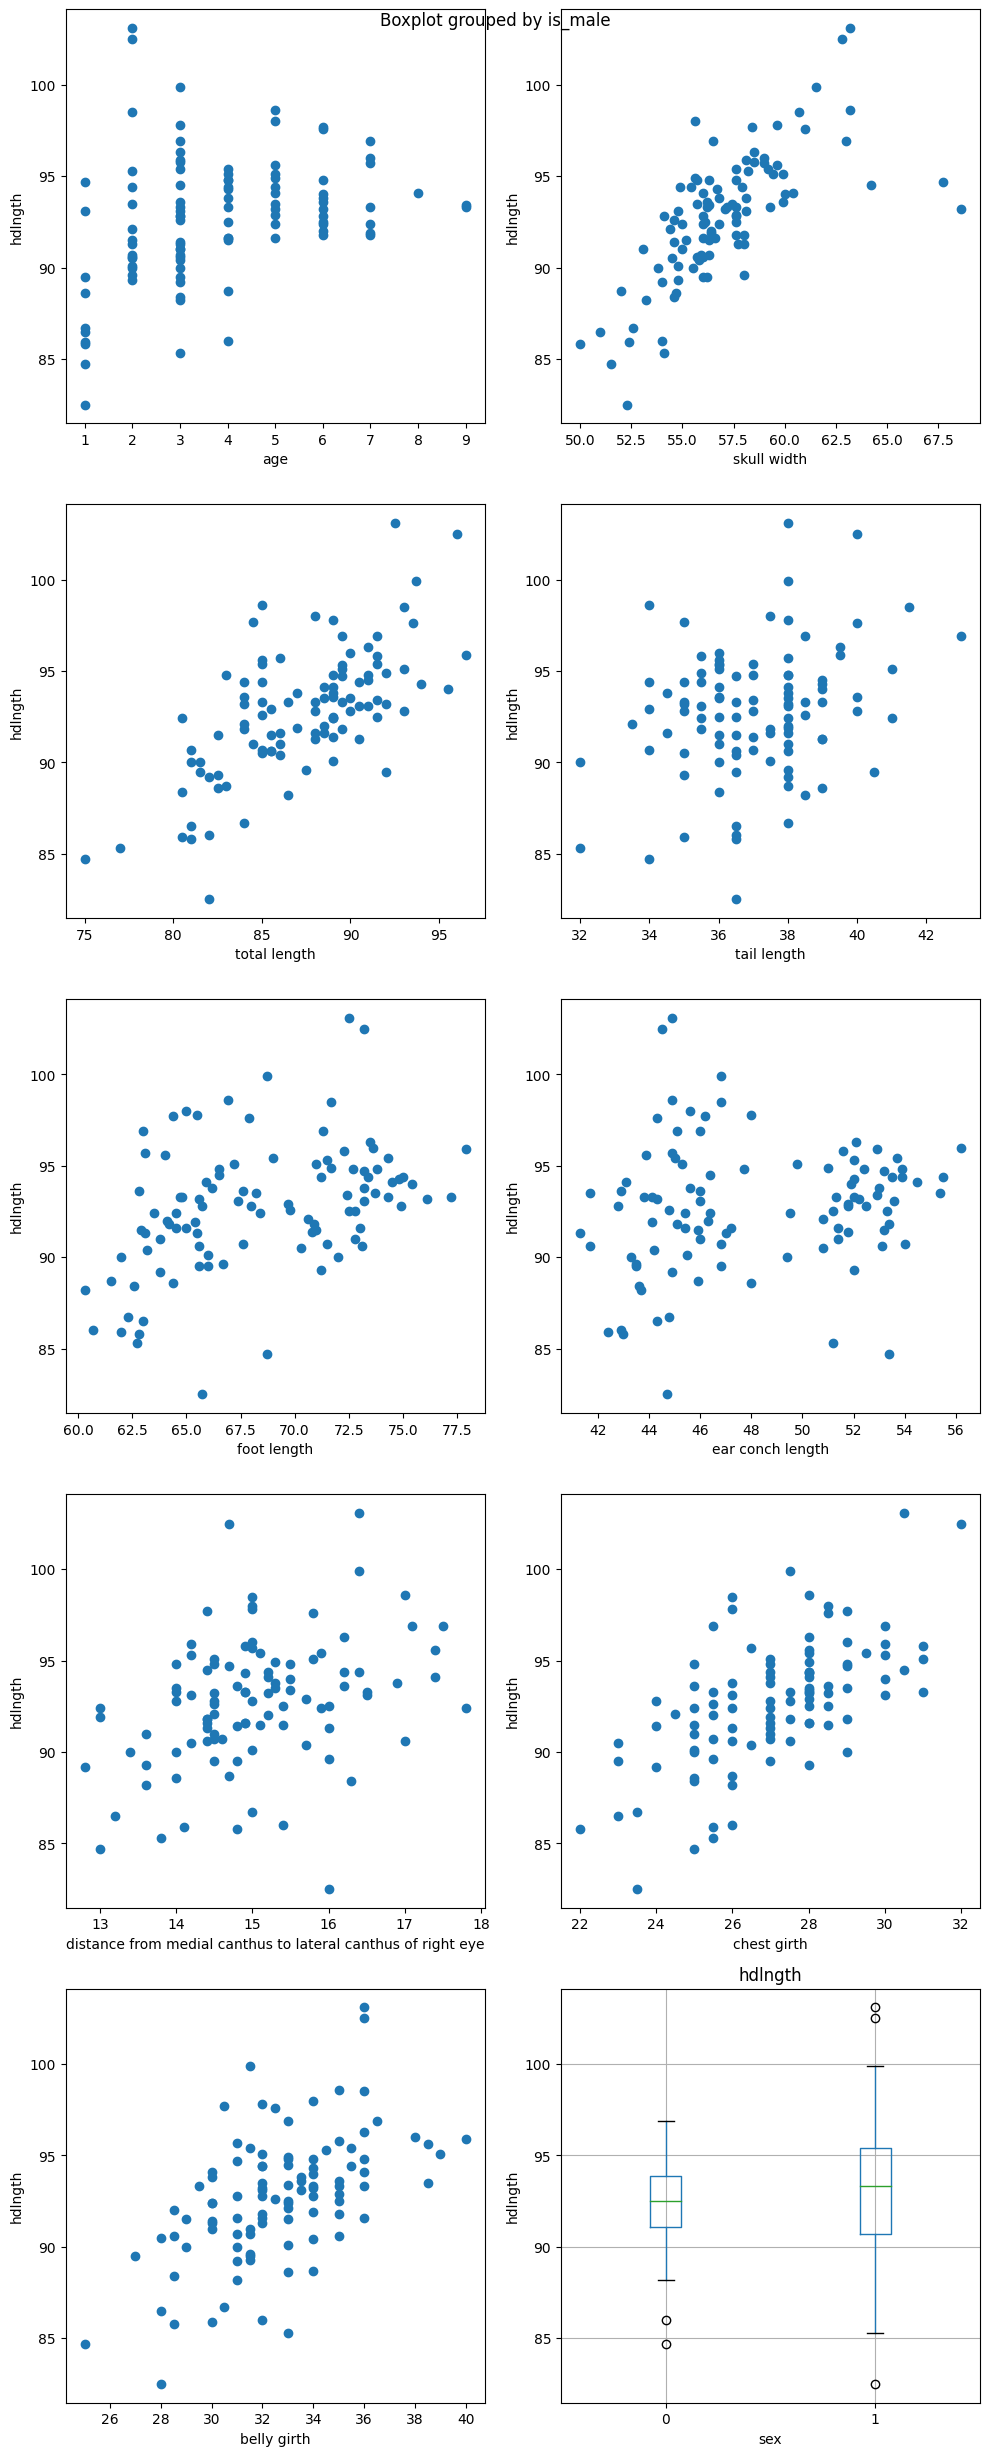

In [216]:
columns = ['age','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly','is_male']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,25))  
axes = axes.flatten() 

for i,column in enumerate(columns):

    if column != 'is_male':
        axes[i].scatter(x=df_possum[column],y=df_possum['hdlngth'])
    else:
        df_possum.boxplot(column='hdlngth', by='is_male', ax=axes[i])
                
    axes[i].set_xlabel(columns_names[column])
    axes[i].set_ylabel('hdlngth')

plt.tight_layout()

plt.show()

Vamos começar a implementação modelo adicionando duas variavéis e estudando a interação entre elas.

In [217]:
model_possum_two = ols('hdlngth ~ totlngth + skullw',data=df_possum).fit()

print(model_possum_two.summary())

                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     83.43
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           6.94e-22
Time:                        14:53:04   Log-Likelihood:                -219.67
No. Observations:                 101   AIC:                             445.3
Df Residuals:                      98   BIC:                             453.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.1036      4.910      6.131      0.0

In [218]:
model_possum_two_int = ols('hdlngth ~ totlngth*skullw',data=df_possum).fit()

print(model_possum_two_int.summary())


                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     55.30
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           6.30e-21
Time:                        14:53:04   Log-Likelihood:                -219.53
No. Observations:                 101   AIC:                             447.1
Df Residuals:                      97   BIC:                             457.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -10.5769     77.912     

Comparando os dois modelos vemos que ao aplicar uma interação entre eles piorou variaveis métricas (Adj. R-squared, F-statistic, etc), mas principalmente tornou os coeficientes estatisticamente irrelevantes.

Vamos desconsiderar as interações entre essas duas variáveis e adicionar mais variaveis ao modelo. Para isso vamos implementar um método chamado backward elimination. Esse método inicia com todas as variaveis no modelo e vai eliminando uma por uma daquelas que possuem valor de p maior do que é considerado estatisticamente significante (vamos considerar 0.05 nesse projeto).

In [219]:
def backward_elimination(X,y, p_value=0.05):
    
    features = X.columns.to_list()

    while len(features) > 0:

        X_with_const = sm.add_constant(X[features])

        temp_model = sm.OLS(y,X_with_const).fit()

        pvalues = temp_model.pvalues.iloc[1:]

        if max(pvalues) > p_value:
            idxmax = pvalues.idxmax()
            features.remove(idxmax)
        else:
            break

    return features, temp_model

In [220]:
X = df_possum.drop(columns=['hdlngth'])
y = df_possum['hdlngth']

selected_features, __ = backward_elimination(X, y)
selected_features

['skullw', 'totlngth', 'taill', 'belly', 'is_male']

A partir do método backward elmination encontramos as variaveis mais significativas. Vamos agora usar essas variaveis para gerar um modelo final e avaliar as suas métrica

In [221]:
model_final = ols('hdlngth ~ skullw + totlngth + taill + belly + is_male',data=df_possum).fit()

print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     41.23
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           2.34e-22
Time:                        14:53:04   Log-Likelihood:                -211.62
No. Observations:                 101   AIC:                             435.2
Df Residuals:                      95   BIC:                             450.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.7581      4.980      6.579      0.0

##### Avaliando o Modelo de Regressão

In [222]:
rsquared_adj = model_final.rsquared_adj
rmse = np.sqrt(model_final.mse_resid)

print(f"Adjust R-squared: {rsquared_adj}")
print(f"RMSE: {rmse}")

Adjust R-squared: 0.6679159793398701
RMSE: 2.0277199007767837


/tmp/ipykernel_16420/3595271053.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


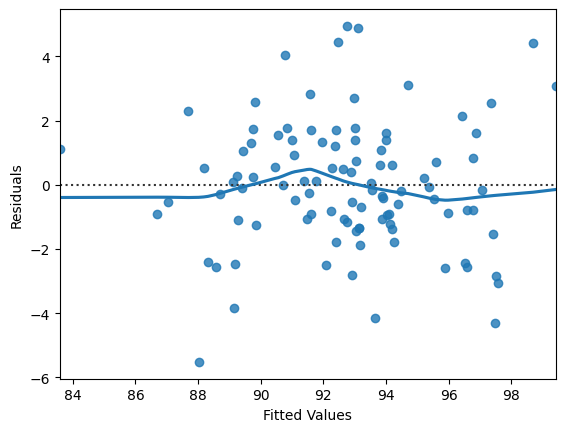

In [223]:

fig = plt.figure()

sns.residplot(x=model_final.fittedvalues, y=model_final.resid, lowess=True)

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

fig.show()

/tmp/ipykernel_16420/141552250.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


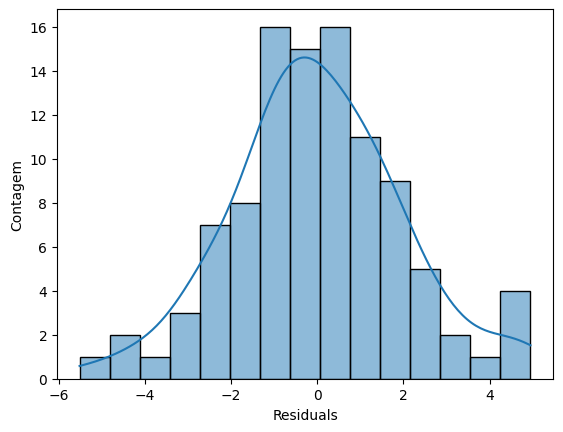

In [224]:
fig = plt.figure()

sns.histplot(x=model_final.resid, bins=15,kde=True)

plt.xlabel('Residuals')
plt.ylabel('Contagem')

fig.show()

Estatística=0.989, p=0.542


/tmp/ipykernel_16420/1465635105.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

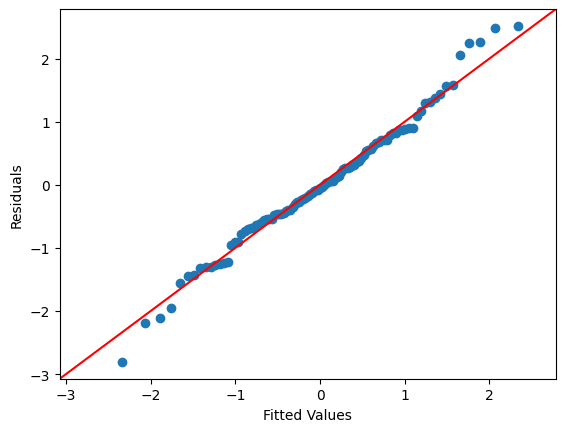

In [225]:
from scipy import stats

resid = model_final.resid

stat, p = stats.shapiro(resid)

print('Estatística=%.3f, p=%.3f' % (stat, p))

fig = plt.figure()

sm.qqplot(model_final.resid,line='45',fit=True)

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

fig.show()

Para concluir, nosso modelo final apresentou um r-squared de 0.66 com um erro médio de residuos de 2.02. Depois plotamos algums gráficos para verificar a distribuição dos residuos. A partir do histograma podemos verificar que aparentemente os residuos seguem um distribuição normal. Já com o QQ-plot e com o Teste de Shapiro-Wilk podemos confirmar essa hipóteses. Primeiramente avaliamos o QQ-plot e verificamos que a distruição dos residuos segue a reta da distribuição normal. Já o teste de Shapiro apresentou p=0.542 confirmando a hipótese de que os residuos estão normalmente distribuidos.

### Regressão Logística

Vamos agora implementar um modelo de regressão logistica para determinar o gênero (is_male).

In [226]:
count = df_possum['is_male'].value_counts()

## proporção
count/sum(count)

is_male
1    0.584158
0    0.415842
Name: count, dtype: float64

As duas classes estão razoavelmente balanceadas. 58% das amostra são machos e o restante fêmeas. Então podemos afirmar que nosso modelo não vai tender a favorecer nenhuma classe.

In [227]:
corr_is_male = df_possum.corr()['is_male']

corr_is_male = pd.concat([corr_is_male, np.abs(corr_is_male)],axis=1,keys=['corr','abs_corr'])

corr_is_male.sort_values('abs_corr',ascending=False)

,corr,abs_corr
is_male,1.000000,1.000000
eye,0.212078,0.212078
totlngth,-0.152441,0.152441
footlgth,-0.137153,0.137153
earconch,-0.133683,0.133683
hdlngth,0.118705,0.118705
chest,-0.117863,0.117863
skullw,0.104349,0.104349
belly,-0.093835,0.093835
age,-0.057821,0.057821


As correlações apresentam valores bem reduzidos sendo a maior 0.21. Também variam bastante entre correlações positivas e negativas. Vamos inicialmente estudar a relação das 4 variaveis de maior correlação.

/tmp/ipykernel_16420/1304084173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_possum_select['sex'] = df_possum_select['is_male'].apply(lambda x: 'male' if x == 1 else 'female')


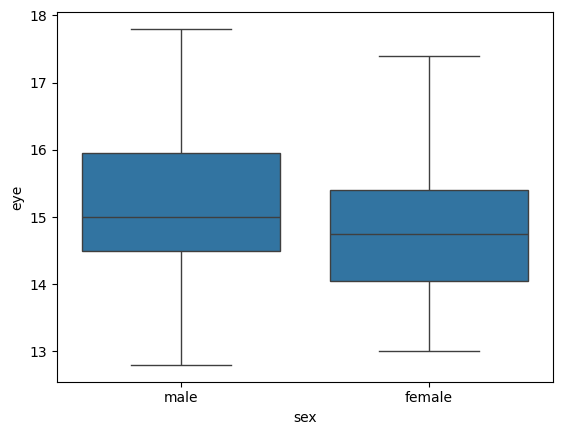

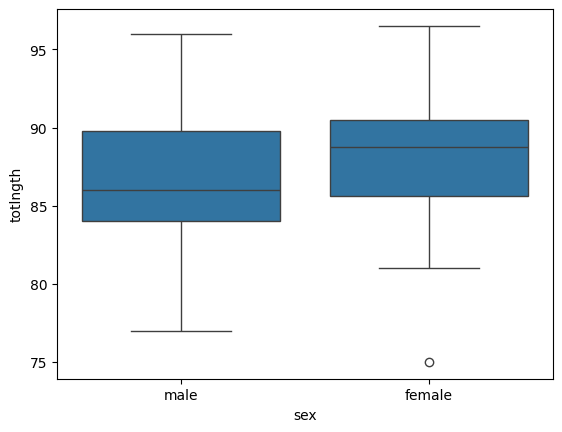

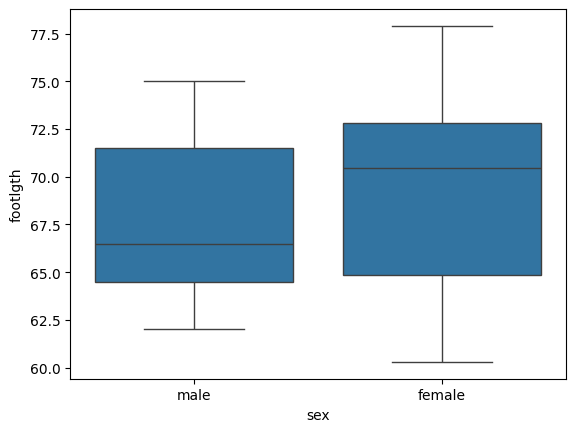

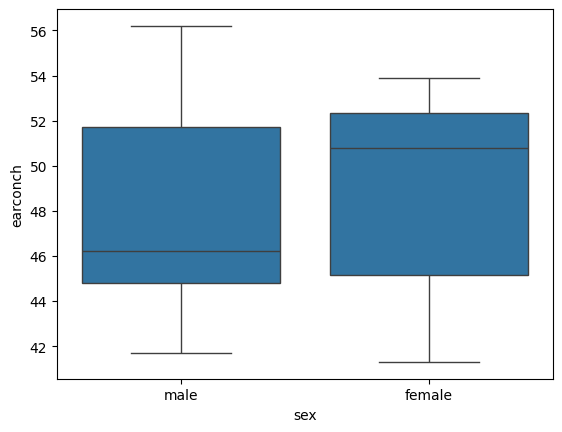

In [228]:
columns = ['is_male','eye','totlngth','footlgth','earconch']

df_possum_select = df_possum[columns]

df_possum_select['sex'] = df_possum_select['is_male'].apply(lambda x: 'male' if x == 1 else 'female')

for column in columns:
    if column == 'is_male': 
        continue

    sns.boxplot(data=df_possum_select,x='sex',y=column)
    plt.show()

In [229]:
model = logit('is_male ~ eye + totlngth + footlgth + earconch + 0',data=df_possum).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.631052
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                is_male   No. Observations:                  101
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            3
Date:                Sat, 22 Mar 2025   Pseudo R-squ.:                 0.07050
Time:                        14:53:07   Log-Likelihood:                -63.736
converged:                       True   LL-Null:                       -68.570
Covariance Type:            nonrobust   LLR p-value:                   0.02161
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
eye            0.6174      0.215      2.872      0.004       0.196       1.039
totlngth      -0.0926      0.

Olhando os coeficientes do modelo verificamos que apenas o coeficiente de eye é estatisticamente significante (0.017 < 0.05). Além disso o modelo apresentou um Pseudo R-squ. longe do ideal (0.2 - 0.4). Vamos aplicar modificações nessas quatros variaveis para tentar aumentar a correlação e melhorar o modelo.

In [230]:
columns = ['is_male','eye','totlngth','footlgth','earconch']

df_possum_select = df_possum[columns]

for column in columns:
    if column == 'is_male': 
        continue

    df_possum_select[f'{column}_sq'] = df_possum_select[column]**2
    df_possum_select[f'{column}_sqrt'] = np.sqrt(df_possum_select[column])
    df_possum_select[f'{column}_log'] = np.log(df_possum_select[column])


df_possum_select.corr()['is_male'].sort_index()


/tmp/ipykernel_16420/3811534458.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_possum_select[f'{column}_sq'] = df_possum_select[column]**2
/tmp/ipykernel_16420/3811534458.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_possum_select[f'{column}_sqrt'] = np.sqrt(df_possum_select[column])
/tmp/ipykernel_16420/3811534458.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

earconch        -0.133683
earconch_log    -0.132804
earconch_sq     -0.133898
earconch_sqrt   -0.133326
eye              0.212078
eye_log          0.214505
eye_sq           0.209285
eye_sqrt         0.213341
footlgth        -0.137153
footlgth_log    -0.130878
footlgth_sq     -0.143229
footlgth_sqrt   -0.134039
is_male          1.000000
totlngth        -0.152441
totlngth_log    -0.151194
totlngth_sq     -0.153304
totlngth_sqrt   -0.151867
Name: is_male, dtype: float64

Nenhuma das transformações foram capazes de aumentar a correlação do modelo. Vamos inserir mais variaveis e avaliar o nome modelo.

In [231]:
model = logit('is_male ~ eye + totlngth + footlgth + earconch + hdlngth + chest + skullw + 0',data=df_possum).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.586438
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                is_male   No. Observations:                  101
Model:                          Logit   Df Residuals:                       94
Method:                           MLE   Df Model:                            6
Date:                Sat, 22 Mar 2025   Pseudo R-squ.:                  0.1362
Time:                        14:53:07   Log-Likelihood:                -59.230
converged:                       True   LL-Null:                       -68.570
Covariance Type:            nonrobust   LLR p-value:                  0.004739
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
eye            0.3172      0.236      1.345      0.179      -0.145       0.779
totlngth      -0.2278      0.

Nesse modelo com mais variaveis produzimos um valor maior de Pseudo R-squared o que era esperado dado o aumento de variaveis, porém corremos o risco de causar um overfitting. Olhando os coeficientes é possiveis notas que hdlngth e totlngth apresentaram um valor significativo. Vamos criar um modelos com apenas essas duas variavel. 

In [232]:
model = logit('is_male ~ totlngth + hdlngth + 0',data=df_possum).fit(disp=False)

print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                is_male   No. Observations:                  101
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Mar 2025   Pseudo R-squ.:                 0.08466
Time:                        14:53:07   Log-Likelihood:                -62.765
converged:                       True   LL-Null:                       -68.570
Covariance Type:            nonrobust   LLR p-value:                 0.0006560
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
totlngth      -0.2387      0.077     -3.110      0.002      -0.389      -0.088
hdlngth        0.2289      0.073      3.154      0.002       0.087       0.371


Esse foi o melhor modelo produzido até agora. R-squared de 0.08 e todos os coeficientes significativos. Vamos iterar sobre todas as variaveis afim de descobrir quais delas se adicionadas ao modelo vão produzir coeficientes significativos.

In [233]:
toremove = ['is_male','totlngth','hdlngth','age']

columns = [col for col in df_possum.columns.to_list() if col not in toremove]


for column in columns:
    temp_model = logit(f'is_male ~ totlngth + hdlngth + {column} + 0',data=df_possum).fit(disp=False)

    print(f"{column} R-Squared: {temp_model.pvalues[column]}")

skullw R-Squared: 0.5872862170423363
taill R-Squared: 0.39687960118724064
footlgth R-Squared: 0.17432092071726057
earconch R-Squared: 0.1701964989938286
eye R-Squared: 0.0704832389039226
chest R-Squared: 0.10160578506067361
belly R-Squared: 0.21901770641836626


Nenhuma outra coluna adicionando foi estatisticamente significante. Vamos Agora focar em tentar achar uma combinação de duas variaveis que gere um modelo melhor. Para isso vamos comparar a métrica loglikelihood.

In [236]:
toremove = ['is_male','age']

columns = [col for col in df_possum.columns.to_list() if col not in toremove]

max_rsquared = 0
min_comb = None
for col1, col2 in combinations(columns,2):
    temp_model = logit(f'is_male ~ {col1} + {col2} + 0',data=df_possum).fit(disp=False)
    
    temp_rsquared = 1 - (temp_model.llf / temp_model.llnull)

    if temp_rsquared > max_rsquared:
        max_rsquared = temp_rsquared
        min_comb = (col1,col2)


print(min_comb,max_rsquared)

('hdlngth', 'totlngth') 0.08465654810618906


A melhor combinação de colunas é hdlngth a totlngth a que já haviamos descobertos. Vamos usa-las para criar um modelo final. 

In [261]:
model_final = logit('is_male ~ hdlngth + totlngth + 0',data=df_possum).fit(disp=False)

print(model_final.summary())

                           Logit Regression Results                           
Dep. Variable:                is_male   No. Observations:                  101
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Mar 2025   Pseudo R-squ.:                 0.08466
Time:                        15:05:55   Log-Likelihood:                -62.765
converged:                       True   LL-Null:                       -68.570
Covariance Type:            nonrobust   LLR p-value:                 0.0006560
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hdlngth        0.2289      0.073      3.154      0.002       0.087       0.371
totlngth      -0.2387      0.077     -3.110      0.002      -0.389      -0.088


In [262]:
conf_matrix = model_final.pred_table()
conf_matrix

array([[21., 21.],
       [12., 47.]])

In [263]:
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

accuracy = (TN + TP)/(TN + TP + FN + FP)
sensitivity = (TP)/(FN + TP)
specificity = (TN)/(TN + FP)


print(f'Accuracy: {accuracy}\nSensitivity: {sensitivity}\nSpecificity: {specificity}')

Accuracy: 0.6732673267326733
Sensitivity: 0.7966101694915254
Specificity: 0.5


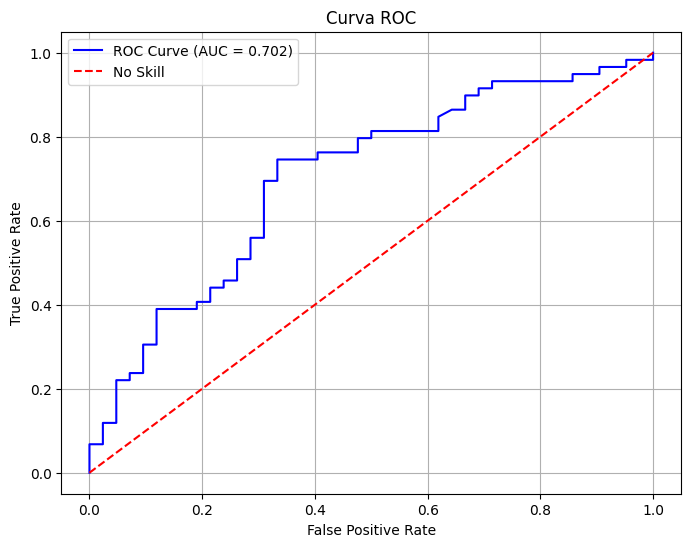

In [267]:
from sklearn.metrics import roc_curve, roc_auc_score

predicted = model_final.predict(df_possum[['hdlngth', 'totlngth']])

fpr, tpr, thresholds = roc_curve(df_possum['is_male'], predicted)

auc = roc_auc_score(df_possum['is_male'], predicted)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill')  # linha de referência
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()